identify heart disease patient
Use KMeans clusterin 

Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt


Retrieve files

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/k-means-clustering-for-heart-disease-analysis/heart_disease.csv
/kaggle/input/k-means-clustering-for-heart-disease-analysis/sample.csv


Read files

In [4]:
data = pd.read_csv('/kaggle/input/k-means-clustering-for-heart-disease-analysis/heart_disease.csv')
submission = pd.read_csv('/kaggle/input/k-means-clustering-for-heart-disease-analysis/sample.csv')

In [5]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [7]:
submission

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
...,...,...
294,910,0
295,911,0
296,912,0
297,916,0


In [8]:
submission['cluster'].value_counts()

0    299
Name: cluster, dtype: int64

In [9]:
heart_data = data
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


Check for null values

In [10]:
heart_data.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

visulization of columns data distribustion

/tmp/ipykernel_32/833059089.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(heart_data[{col}], bins='auto', edgecolor='black')


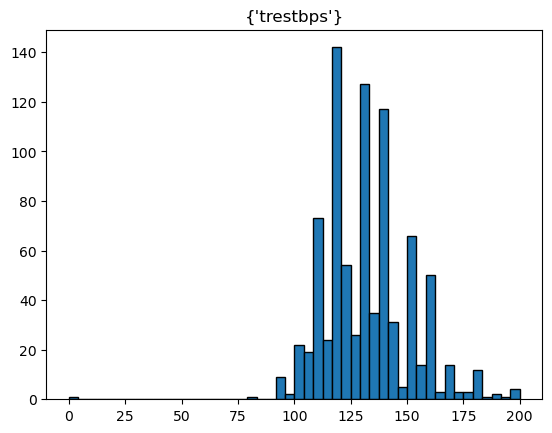

/tmp/ipykernel_32/833059089.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(heart_data[{col}], bins='auto', edgecolor='black')


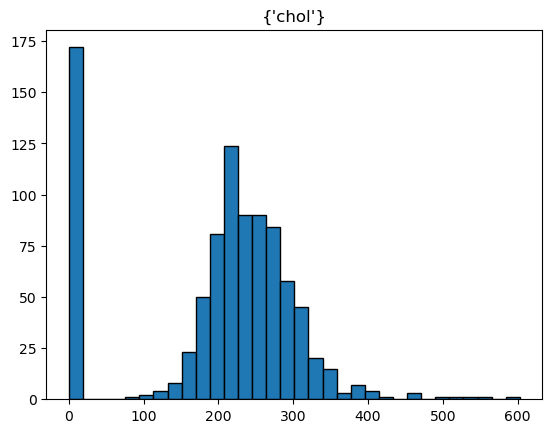

/tmp/ipykernel_32/833059089.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(heart_data[{col}], bins='auto', edgecolor='black')


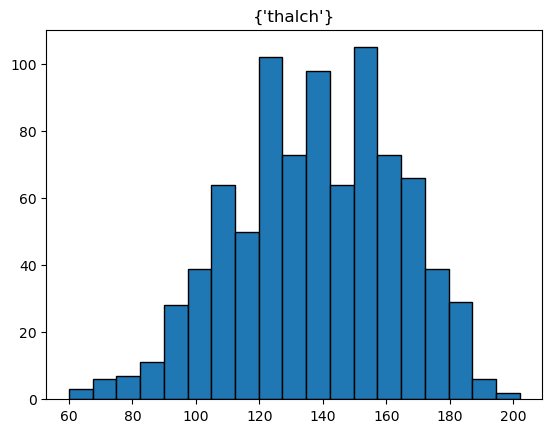

/tmp/ipykernel_32/833059089.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(heart_data[{col}], bins='auto', edgecolor='black')


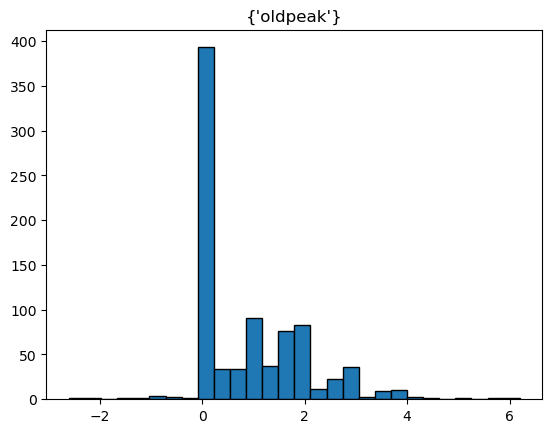

/tmp/ipykernel_32/833059089.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(heart_data[{col}], bins='auto', edgecolor='black')


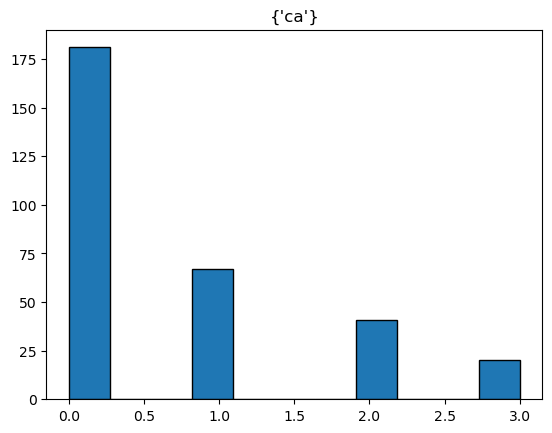

In [11]:
num_col = ['trestbps','chol', 'thalch','oldpeak','ca']
for col in num_col:
    # Plotting the distribution of numerical column
    plt.hist(heart_data[{col}], bins='auto', edgecolor='black')
    plt.title({col})
    plt.show()


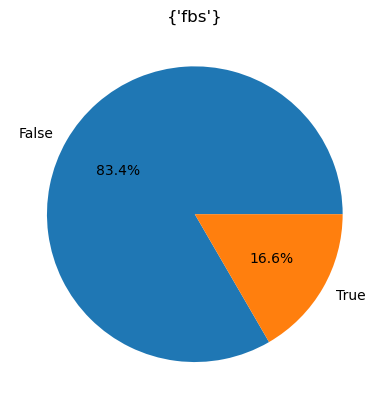

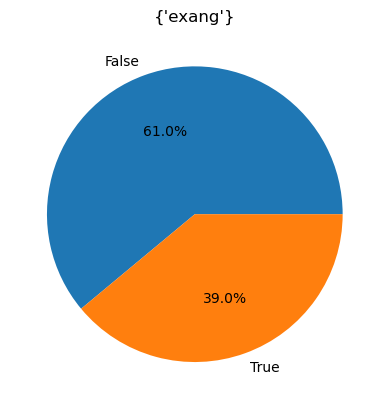

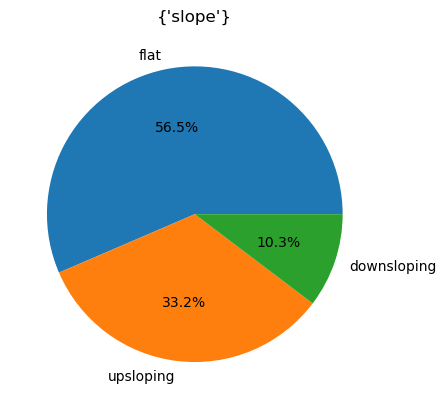

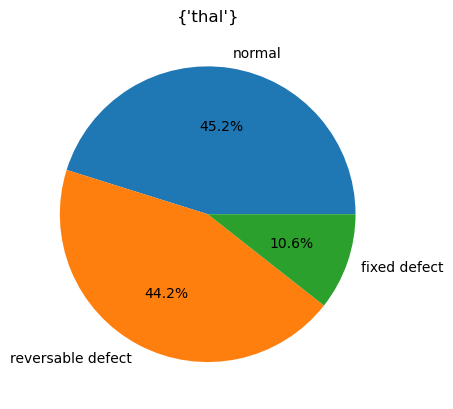

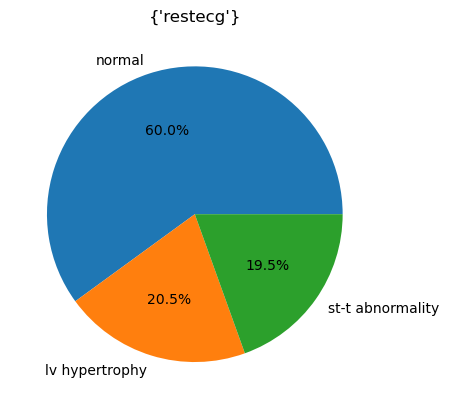

In [12]:
cat_col = ['fbs','exang','slope','thal','restecg']
for col in cat_col:
    # Plotting the distribution of categorical column
    # Count the frequency of each value in the column
    catcol_counts = heart_data[col].value_counts()

    # Plotting the distribution of column as a pie chart
    plt.pie(catcol_counts.values, labels=catcol_counts.index, autopct='%1.1f%%')

    # Adding title to the plot
    plt.title({col})

    # Display the plot
    plt.show()

impute values based on visulization

In [13]:
# exang & fbs both columns have true and false value so we can impute them randomly
# Columns to impute missing values
columns_to_impute = ['fbs', 'exang']

# Iterate over the columns
for column in columns_to_impute:
    # Check if column has missing values
    if heart_data[column].isnull().any():
        # Get indices of missing values
        missing_indices = heart_data[heart_data[column].isnull()].index
        # Randomly impute missing values with True or False
        random_values = np.random.choice([True, False], size=len(missing_indices))
        heart_data.loc[missing_indices, column] = random_values
    

In [14]:
# thal and slope columns contain more categories as well as both contain high number of missisng values so creating another category

# Columns to impute missing values
columns_to_impute = ['slope', 'thal']

# Iterate over the columns
for column in columns_to_impute:
    # Check if column has missing values
    if heart_data[column].isnull().any():
        # Replace missing values with 'NotKnown'
        heart_data[column].fillna('NotKnown', inplace=True)

In [15]:
# column restecg contain only 2 missing values impute them by normal calss(mode)
col2impute = ['restecg']
for column in col2impute:
    # Check if column has missing values
    if heart_data[column].isnull().any():
        # Replace missing values with 'NotKnown'
        heart_data[column].fillna('normal', inplace=True)

In [16]:
# Columns to impute missing values
cat_col_mean = ['trestbps','chol', 'thalch','oldpeak','ca']

# Iterate over the columns
for column in cat_col_mean:
    # Check if column has missing values
    if heart_data[column].isnull().any():
        # Calculate mean
        mean_value = heart_data[column].mean()
        # Impute missing values with mean
        heart_data[column].fillna(mean_value, inplace=True)

Drop id and exists

In [17]:
heart_data.drop(['id'], axis=1, inplace=True)
heart_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect
1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal
2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NotKnown,0.676375,NotKnown
916,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,NotKnown,0.676375,NotKnown
917,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NotKnown,0.676375,fixed defect
918,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,NotKnown,0.676375,NotKnown


In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    object 
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    object 
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        920 non-null    float64
 13  thal      920 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 100.8+ KB


Encode

In [19]:
for col in heart_data:
    print(col, heart_data[col].dtype)

age int64
sex object
dataset object
cp object
trestbps float64
chol float64
fbs object
restecg object
thalch float64
exang object
oldpeak float64
slope object
ca float64
thal object


In [20]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for col in heart_data:
    if heart_data[col].dtype == 'object':
        heart_data[col] = heart_data[col].astype(str)
        heart_data[col] = enc.fit_transform(heart_data[col].values.reshape(-1,1))
        
heart_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.0,2.300000,1.0,0.000000,1.0
1,67,1.0,0.0,0.0,160.000000,286.0,0.0,0.0,108.000000,1.0,1.500000,2.0,3.000000,2.0
2,67,1.0,0.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.0,2.600000,2.0,2.000000,3.0
3,37,1.0,0.0,2.0,130.000000,250.0,0.0,1.0,187.000000,0.0,3.500000,1.0,0.000000,2.0
4,41,0.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.0,1.400000,3.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0.0,3.0,0.0,127.000000,333.0,1.0,2.0,154.000000,0.0,0.000000,0.0,0.676375,0.0
916,62,1.0,3.0,3.0,132.132404,139.0,0.0,2.0,137.545665,0.0,0.878788,0.0,0.676375,0.0
917,55,1.0,3.0,0.0,122.000000,223.0,1.0,2.0,100.000000,0.0,0.000000,0.0,0.676375,1.0
918,58,1.0,3.0,0.0,132.132404,385.0,1.0,0.0,137.545665,0.0,0.878788,0.0,0.676375,0.0


Elbow method

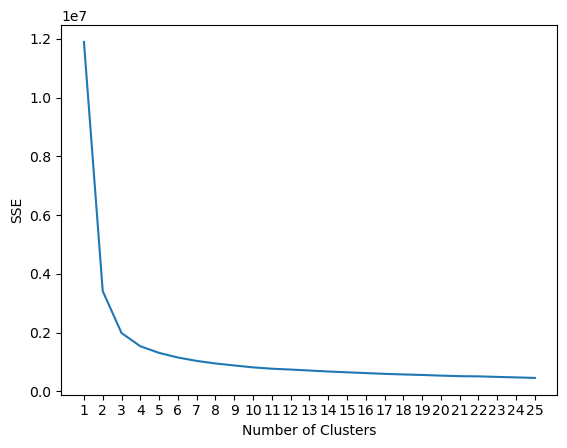

In [21]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "k-means++",
"n_init": 15,
"random_state": 42,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(heart_data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 16), sse)
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


KMeans

In [22]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=15, random_state=42)

#fit k-means algorithm to data
kmeans.fit(heart_data)

#view cluster assignments for each observation
#predictions = kmeans.labels_
#predictions
prediction = []

# Iterate over the range of IDs
for i in range(920):
    # Check if ID exists in submission
    if i in submission['id'].values:
        # Get the index of the ID in submission
        index = submission[submission['id'] == i].index[0]
        # Get the label from K-means clustering result
        label = kmeans.labels_[index]
        # Store the label in the prediction variable
        prediction.append(label)

Visualise clusters

(3, 14)


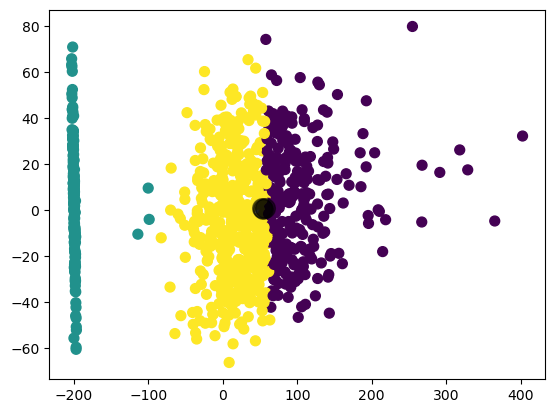

In [25]:
from sklearn.decomposition import PCA

pca = PCA(2)

pca_data = pca.fit_transform(heart_data)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Prepare submission

In [26]:
submission['cluster'] = prediction
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,id,cluster
0,0,2
1,1,0
2,3,2
3,4,2
4,7,2
...,...,...
294,910,2
295,911,2
296,912,2
297,916,2
